(98.43953923642411, -95.08584154340372, 95.08584154340372)


Renderer(camera=OrthographicCamera(bottom=-100.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

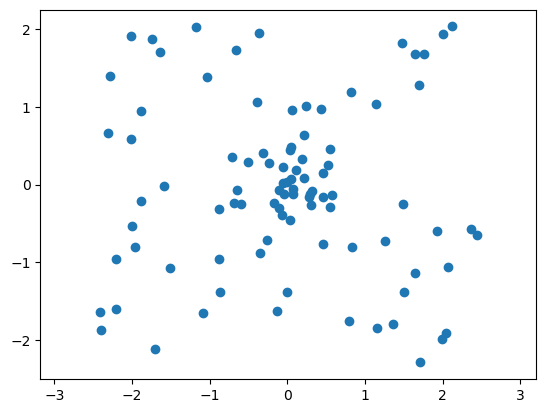

In [10]:
from pyoptools.all import *
from math import sqrt, pi, cos, sin, radians
import random

lens_radius = 25
L1 = SphericalLens(radius=lens_radius, curvature_s1=1./100., curvature_s2=-1./100., thickness=10, material=material.schott["N-BK7"])
C = CCD(size=(5,5))

f = L1.paraxial_constants()
print(f)

lens_location = (0, 0, 200)
CCD_location = (0, 0, 296)

S = System(complist=[(L1, lens_location, (0,0,0)), (C, CCD_location, (0,0,0))], n=1)

num_ps = 1000    
source_wavelength = 0.550


for i in range(num_ps):
    r = random.uniform(0, lens_radius)
    phi = random.uniform(0, 2 * pi)
    theta_deg = random.uniform(0,360)
    theta = radians(theta_deg)
    
    x = r * cos(phi)
    y = r * sin(phi)
   
    dx = sin(theta)*cos(phi)
    dy = sin(theta)*sin(phi)
    dz = cos(theta)
    
    rays = Ray(pos=(x, y, 0), dir=(dx, dy, dz), wavelength=source_wavelength)
    S.ray_add([rays])


S.propagate()
spot_diagram(C)

Plot3D(S, size=(450, 100), scale=2, rot=[(0, -pi/2, 0), (pi/20, -pi/10, 0)])
